In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

In [2]:
sc.settings.verbosity = 2             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi_save=300, facecolor='white')

scanpy==1.6.0 anndata==0.7.4 umap==0.4.6 numpy==1.18.1 scipy==1.4.1 pandas==1.0.1 scikit-learn==0.22.1 statsmodels==0.11.0 python-igraph==0.7.1 louvain==0.7.0 leidenalg==0.7.0


In [4]:
adata = sc.read_csv('20210505_smFISH_ImarisClearedCellAnalysisCompiled - P17_GoodAttempt_Filteredto10.csv')

In [6]:
sc.pp.normalize_total(adata)

normalizing counts per cell
    finished (0:00:00)


In [7]:
sc.pp.log1p(adata)

In [8]:
adata.raw = adata

In [9]:
sc.pp.scale(adata, max_value=1)

In [10]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    with n_comps=3
    finished (0:00:00)


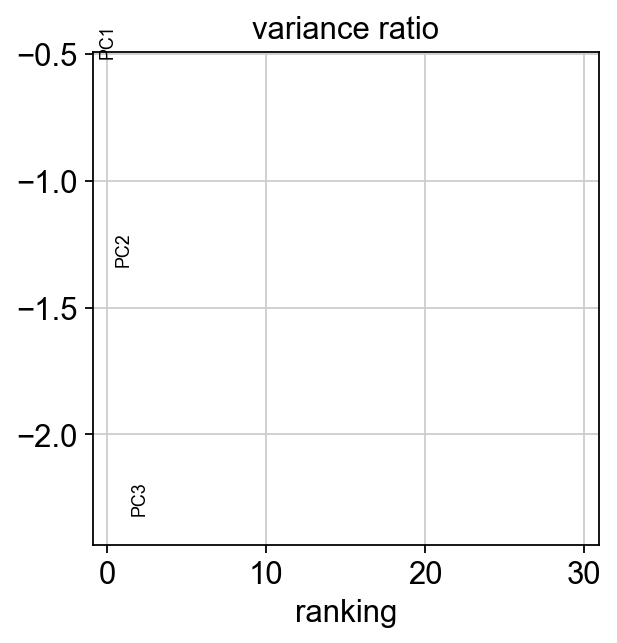

In [12]:
sc.pl.pca_variance_ratio(adata, log=True)

In [30]:
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=3)

computing neighbors
    using data matrix X directly
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


In [31]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:00)


In [46]:
sc.tl.leiden(adata, resolution = 0.3, key_added ='clusters')

running Leiden clustering
    finished: found 3 clusters and added
    'clusters', the cluster labels (adata.obs, categorical) (0:00:00)


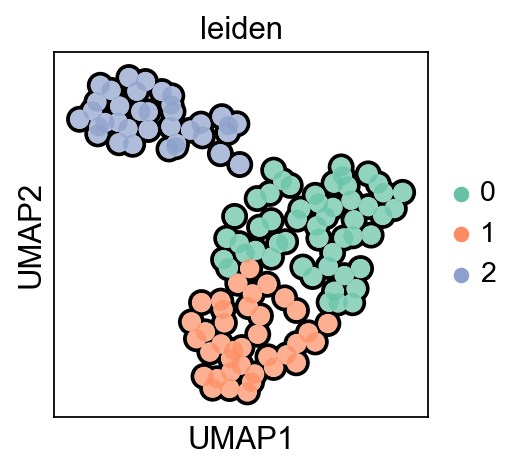

In [47]:
sc.pl.umap(adata, color=['leiden'],
           palette = sns.color_palette('Set2'),
           add_outline= True, outline_width=(0.2, 0), s = 300, outline_color=('black', 'white'), save = 'P17_smFISHUMAP_Cluster.png')
